导入中国数据

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#数据预处理
import pandas
data_filename='/content/data_china.csv'
data=pandas.read_csv(data_filename,sep=',',decimal='.',encoding='gbk')
data.head()

,Unnamed: 0,年份,日期,确诊病例,疑似病例,死亡病例,治愈病例
0,1,2021,1.05,97127,3,4794,91008
1,2,2021,1.06,97217,0,4795,91106
2,3,2021,1.07,97306,0,4795,91188
3,4,2021,1.08,97387,1,4796,91262
4,5,2021,1.09,97518,1,4798,91351


In [ ]:
data.index

RangeIndex(start=0, stop=60, step=1)

In [ ]:
#一共有多少个确诊病例、死亡病例、治愈病例
a=data['确诊病例'].sum()
b=data['死亡病例'].sum()
c=data['治愈病例'].sum()
print(a)
print(b)
print(c)

6026271
289461
5642767


In [ ]:
print(data.dtypes)

Unnamed: 0      int64
年份              int64
日期            float64
确诊病例            int64
疑似病例            int64
死亡病例            int64
治愈病例            int64
dtype: object


数据描述

In [ ]:
data.describe()

,Unnamed: 0,年份,日期,确诊病例,疑似病例,死亡病例,治愈病例
count,60.000000,60.0,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,2021.0,1.784500,100437.850000,2.050000,4824.350000,94046.116667
std,17.464249,0.0,0.605191,1558.988153,1.407305,17.387727,1953.338447
min,1.000000,2021.0,1.050000,97127.000000,0.000000,4794.000000,91008.000000
25%,15.750000,2021.0,1.197500,99358.250000,1.000000,4807.750000,92133.250000
50%,30.500000,2021.0,2.035000,101165.000000,2.000000,4830.000000,94206.500000
75%,45.250000,2021.0,2.182500,101629.500000,3.000000,4842.000000,95944.000000
max,60.000000,2021.0,3.050000,102036.000000,6.000000,4846.000000,96732.000000


In [ ]:
#数据探索性分析

import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from sklearn. preprocessing import StandardScaler, OneHotEncoder
from sklearn. model_selection import train_test_split
import seaborn as sns
from scipy. stats import norm
from scipy import stats
from pandas import DataFrame
import matplotlib
%matplotlib inline

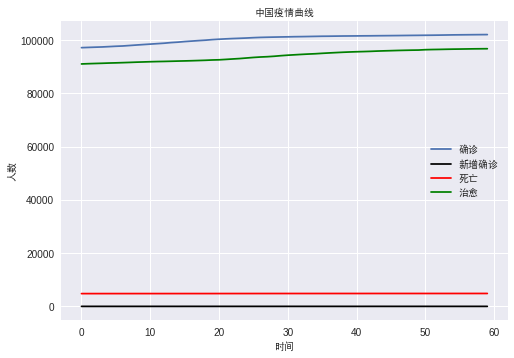

In [ ]:
#当前现有的走势图
plt.style.use("seaborn")
zhfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/SimHei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.plot(data['确诊病例'], label='确诊')
plt.plot(data['疑似病例'], color='black',label='新增确诊')
plt.plot(data['死亡病例'], color='red',label='死亡')
plt.plot(data['治愈病例'], color='green',label='治愈')
plt.xlabel('时间', fontproperties=zhfont)
plt.ylabel('人数', fontproperties=zhfont)
plt.title("中国疫情曲线", fontproperties=zhfont)
plt.legend(loc="best", prop=zhfont) #加图例

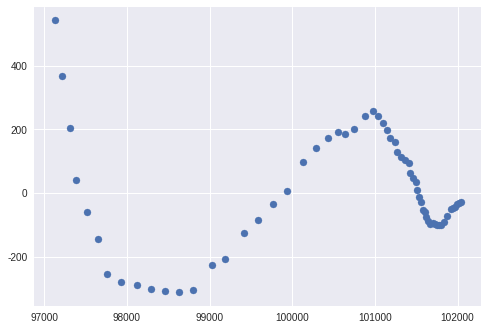

In [ ]:
#用增长模型预测
def logistic_increase_function(p, t):
    K, a, b = p
    exp_value = np.exp(-a * (t - b))
    return K / (1 + exp_value)
# 定义预测误差函数
def err_f(p, t, y):
    return logistic_increase_function(p, t) - y
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
# from scipy.optimize import curve_fit  # 非线性最小二乘法拟合
from scipy.optimize  import leastsq
from scipy.optimize  import leastsq

# 参数初始值
logistic_p0 = [800000, 1, 30]  
 
# 我们选择的数据
t = np.array([i + 1 for i in range(60)])
China_y = data['确诊病例'].values
 
# 利用最小二乘法求解参数
logistic_params = leastsq(err_f, logistic_p0, args=(t, China_y))
 
China_p = logistic_params[0]
 
# 利用我们定义的逻辑斯蒂增长函数预测
China_predict_data = logistic_increase_function(China_p, t)
China_predict_data
 
# 预测的误差
China_e = China_y - China_predict_data
China_e
 
# 绘制误差的散点图
plt.scatter(China_y, China_e)



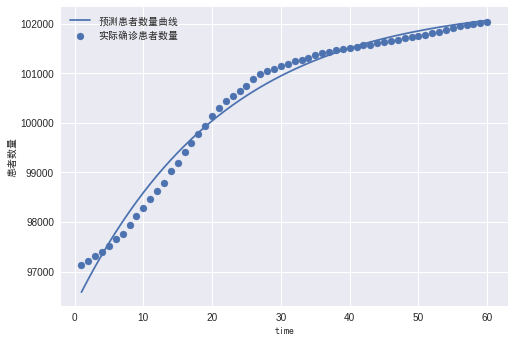

In [ ]:
# 绘图
zhfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/SimHei.ttf')
plt.scatter(t, China_y, label="实际确诊患者数量")
plt.plot(t, China_predict_data, label='预测患者数量曲线')
plt.xlabel('time', fontproperties=zhfont)
plt.ylabel('患者数量', fontproperties=zhfont)
plt.legend(loc='best', prop=zhfont)

In [ ]:
# 预测中国疫情未来1天走势
future_t = [i + 1 for i in range(0, 1)]
China_future_fit = logistic_increase_function(China_p, future_t)
China_future_fit

array([96584.50139536])

In [ ]:
# 预测中国疫情未来30天走势
future_t = [i + 1 for i in range(0, 60)]
China_future_fit = logistic_increase_function(China_p, future_t)
China_future_fit

array([ 96584.50139536,  96849.16699589,  97102.44563498,  97344.76807236,
        97576.55411308,  97798.21237246,  98010.14010478,  98212.72309017,
        98406.33557399,  98591.34025363,  98768.08830787,  98936.91946403,
        99098.16209887,  99252.13336904,  99399.13936753,  99539.47530254,
        99673.42569577,  99801.26459714,  99923.25581326, 100039.6531473 ,
       100150.70064803, 100256.63286605, 100357.67511529, 100454.04373842,
       100545.94637435, 100633.58222695, 100717.1423334 , 100796.80983155,
       100872.76022506, 100945.16164584, 101014.17511281, 101079.9547867 ,
       101142.64822009, 101202.39660257, 101259.3350004 , 101313.59259053,
       101365.29288883, 101414.55397207, 101461.48869386, 101506.20489422,
       101548.80560276, 101589.38923564, 101628.049786  , 101664.8770082 ,
       101699.95659569, 101733.37035273, 101765.19635998, 101795.50913409,
       101824.37978141, 101851.87614585, 101878.06295123, 101903.00193801,
       101926.75199471, 1

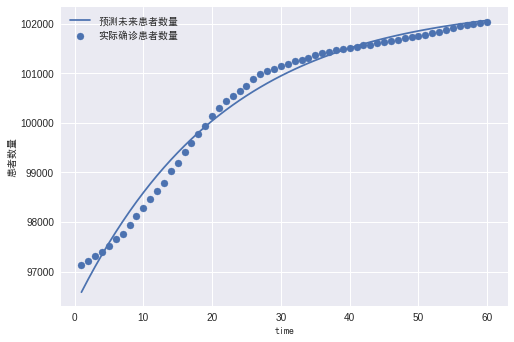

In [ ]:
# 绘图
plt.scatter(t, China_y, label="实际确诊患者数量")
plt.plot(future_t, China_future_fit, label="预测未来患者数量")
plt.xlabel('time', fontproperties=zhfont)
plt.ylabel('患者数量', fontproperties=zhfont)
plt.legend(loc='best', prop=zhfont) 